**INTRODUCTION**

The primary objective is to find a quick way to summarize state record data from 1990 to 2019 using Networks. Networks provide a theoretical framework for conceptually representing interrelations in a wide variety of systems and discovering statistically significant interrelationships between variables in large databases.

**ABOUT THE DATA**

The record data is obtained from the official FBI website, which provides data on crime rates from 1990 to 2019 by year. This data includes two significant crime categories, property crime and violent crime, which are further subdivided into distinct types of crime.


IMPORT LIBRARIES

In [48]:
import nltk
import string
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.sentiment import SentimentIntensityAnalyzer

import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from apyori import apriori
import networkx as nx 
import warnings
warnings.filterwarnings('ignore')

IMPORT DATA

In [49]:
df = pd.read_csv('../../data/modified-data/cleaned_state_crime_record_data.csv')
#create new column with the predicted category
df['property_crime'] = df[['Property_Burglary_Rate', 'Property_Larceny_Rate','Property_Larceny_Rate']].idxmax(axis=1)
df['Violent_label'] = df[['Violent_Assault_Rate', 'Violent_Murder_Rate','Violent_Rape_Rate','Violent_Robbery_Rate']].idxmax(axis=1)
df.head()


,State,Year,Population,Property_Crime_Rate,Property_Burglary_Rate,Property_Larceny_Rate,Property_Motor_Rate,Violent_Crime_Rate,Violent_Assault_Rate,Violent_Murder_Rate,Violent_Rape_Rate,Violent_Robbery_Rate,property_crime,Violent_label
0,Alabama,1960,3266740,1035.4,355.9,592.1,87.3,186.6,138.1,12.4,8.6,27.5,Property_Larceny_Rate,Violent_Assault_Rate
1,Alabama,1961,3302000,985.5,339.3,569.4,76.8,168.5,128.9,12.9,7.6,19.1,Property_Larceny_Rate,Violent_Assault_Rate
2,Alabama,1962,3358000,1067.0,349.1,634.5,83.4,157.3,119.0,9.4,6.5,22.5,Property_Larceny_Rate,Violent_Assault_Rate
3,Alabama,1963,3347000,1150.9,376.9,683.4,90.6,182.7,142.1,10.2,5.7,24.7,Property_Larceny_Rate,Violent_Assault_Rate
4,Alabama,1964,3407000,1358.7,466.6,784.1,108.0,213.1,163.0,9.3,11.7,29.1,Property_Larceny_Rate,Violent_Assault_Rate


**NETWORKING ANALYSIS**

A network is a structure that represents a group of objects/people and their relationships. In arithmetic, it is also known as a graph. The components of a network structure are nodes and edges. Here, nodes indicate the things that will be analyzed, while edges represent their relationships.

Network Analysis has many practical applications in the real world. It facilitates a thorough comprehension of the structure of a relationship in social networks, the structure or process of change in natural phenomena, and the analysis of biological systems.

Identifying the essential node in a network is a crucial application of network analysis. This endeavor is known as Network Centrality Measurement.

*Advantages of Network Analysis:*

- Network analysis is a very important and powerful tool that is used to plan, schedule, and keep track of operations in large and complicated projects.

- Network analysis is a very useful tool for figuring out how well things are going compared to what was planned.

- Using technology, network analysis can figure out how different tasks depend on each other so that they can be properly integrated and coordinated.

- Network analysis makes sure that the different parts of a project work well together and talk to each other.

- Network analysis looks at the trade-off between time and money and gives the best schedule for the project.

*Disadvantages of Network Analysis:*

- In network analysis, building networks for complex projects is hard and takes a lot of time.

- It's hard to guess how long different things will take in real time.

- Analysis of the project is a very hard task because the project has a limited amount of resources.

**ASSOCIATION RULE MINING**

Association rule mining is a very important data mining technique. It is used to find patterns in the database that show up often. The main goal of association rule mining is to find interesting connections and links between the different things in the database. Association rules are used in a lot of different areas to find patterns in the data. With patterns, we can figure out how many different ways events can happen at the same time. A lot of data is put through rules of association.

In association rule mining, rules are made through the following two steps:

- All of the common item sets can be found with the least amount of help.

- Strong association rules are made from these sets of frequently used items, with confidence c above a predetermined threshold value.

The first step takes more concentration because it's hard to find all of the often-used item sets.


**Apriori Algorithm**

The Apriori algorithm is the most common and well-known way to find association rules. It is used to make sets of items that are used often for the database. The main goal of the apriori algorithm is to figure out how different objects are related to each other. The association rule says how two or more objects are related to each other. Frequent pattern mining is another name for the Apriori algorithm. Most of the time, the Apriori algorithm is used on a database that has a lot of transactions.

*Advantages of Apriori Algorithm:*

- This association rule learning algorithm is the simplest and easiest to understand.

- The rules that come out of this are easy to understand and communicate to end users.

- It doesn't need labeled data because it is fully unsupervised. Because unlabeled data is often easier to get, you can use it in many different situations.

- Based on this implementation, many extensions for different uses were suggested. For example, there are association learning algorithms that take into account the order of items, their number, and the timestamps that go with them.

- The algorithm is complete, so it finds all the rules that have the support and confidence levels that were given.

*Disadvantages of Apriori Algorithm:*

- The Apriori algorithm only needs a small amount of support in the data set.

- The amount of time it takes to hold a lot of candidate sets with a lot of common item sets. So, it doesn't work well when there are a lot of datasets.

In [50]:
records = []
for i in range(len(df)):
    records.append([str(df.values[i,j]) for j in range(0, 14)])

Running the apriori algorithm for min_support=0.003, min_confidence=0.2, min_lift=2, min_length=2 :

In [51]:
association_rules = apriori(records, min_support=0.003, min_confidence=0.2, min_lift=2, min_length=2)
association_results = list(association_rules)


RESULTS

In [52]:
for item in association_results:
    
    # first index of the inner list
    # Contains base item and add item
    pair = item[0] 
    items = [x for x in pair]
    print("Rule: " + items[0] + " -> " + items[1])
    
    #second index of the inner list
    print("Support: " + str(item[1]))
    
    #third index of the list located at 0th
    #of the third index of the inner list

    print("Confidence: " + str(item[2][0][2]))
    print("Lift: " + str(item[2][0][3]))
    print("=====================================")

Rule: Violent_Robbery_Rate -> 1960
Support: 0.004815409309791332
Confidence: 0.29411764705882354
Lift: 3.192252510760402
Rule: Violent_Robbery_Rate -> 1961
Support: 0.0038523274478330658
Confidence: 0.23529411764705882
Lift: 2.5538020086083213
Rule: 1962 -> Violent_Robbery_Rate
Support: 0.003531300160513644
Confidence: 0.21568627450980393
Lift: 2.3409851745576282
Rule: Violent_Robbery_Rate -> 1968
Support: 0.0038523274478330658
Confidence: 0.23076923076923075
Lift: 2.5046904315196996
Rule: Violent_Robbery_Rate -> 1969
Support: 0.0044943820224719105
Confidence: 0.2692307692307692
Lift: 2.9221388367729833
Rule: 1970 -> Violent_Robbery_Rate
Support: 0.004815409309791332
Confidence: 0.28846153846153844
Lift: 3.1308630393996246
Rule: Violent_Robbery_Rate -> 1971
Support: 0.0044943820224719105
Confidence: 0.2692307692307692
Lift: 2.9221388367729833
Rule: Violent_Robbery_Rate -> 1972
Support: 0.0038523274478330658
Confidence: 0.23076923076923075
Lift: 2.5046904315196996
Rule: Violent_Robbery_

HELPER FUNCTION
- **reformat_results**: Reformats the results from the apriori algorithm into a dataframe with values for itemsets, support, confidence, and lift.
- **convert_to_network**: Converts the apriori dataframe into a Network Graph.
- **plot_network**: Visualisation of the Network Graph.

In [53]:
def reformat_results(results):

    #CLEAN-UP RESULTS 
    keep=[]
    for i in range(0,len(results)):
        for j in range(0,len(list(results[i]))):
            # print(results)
            if(j>1):
                for k in range(0,len(list(results[i][j]))):
                    if(len(results[i][j][k][0])!=0):
                        #print(len(results[i][j][k][0]),results[i][j][k][0])
                        rhs=list(results[i][j][k][0])
                        lhs=list(results[i][j][k][1])
                        conf=float(results[i][j][k][2])
                        lift=float(results[i][j][k][3])
                        keep.append([rhs,lhs,supp,conf,supp*conf,lift])
                        # keep.append()
            if(j==1):
                supp=results[i][j]

    return pd.DataFrame(keep, columns =["rhs","lhs","supp","conf","supp x conf","lift"])

In [54]:
def convert_to_network(df):
    #print(df)

    #BUILD GRAPH
    G = nx.DiGraph()  # DIRECTED
    for row in df.iterrows():
        # for column in df.columns:
        lhs="_".join(row[1][0])
        rhs="_".join(row[1][1])
        conf=row[1][3]; #print(conf)
        if(lhs not in G.nodes): 
            G.add_node(lhs)
        if(rhs not in G.nodes): 
            G.add_node(rhs)

        edge=(lhs,rhs)
        if edge not in G.edges:
            G.add_edge(lhs, rhs, weight=conf)

    # print(G.nodes)
    # print(G.edges)
    return G

In [58]:
def plot_network(G):
    #SPECIFIY X-Y POSITIONS FOR PLOTTING
    pos=nx.random_layout(G)

    #GENERATE PLOT
    fig, ax = plt.subplots()
    fig.set_size_inches(45, 45)

    #assign colors based on attributes
    weights_e 	= [G[u][v]['weight'] for u,v in G.edges()]

    #SAMPLE CMAP FOR COLORS 
    cmap=plt.cm.get_cmap('Blues')
    colors_e 	= [cmap(G[u][v]['weight']*10) for u,v in G.edges()]

    #PLOT
    nx.draw(
    G,
    node_color='crimson',
    edgecolors="black",
    edge_color=colors_e,
    node_size=7000,
    linewidths=2,
    font_size=12,
    font_color="black",
    width=weights_e,
    with_labels=True,
    pos=pos,
    ax=ax
    )
    ax.set_title("NetworkX Graph for Association Rules", fontsize=50)
    
    plt.show()

# raise

FINAL RESULTS

In [56]:
result_df = reformat_results(association_results)
print("Results\n",len(association_results))

Results
 46


VISUALISATION

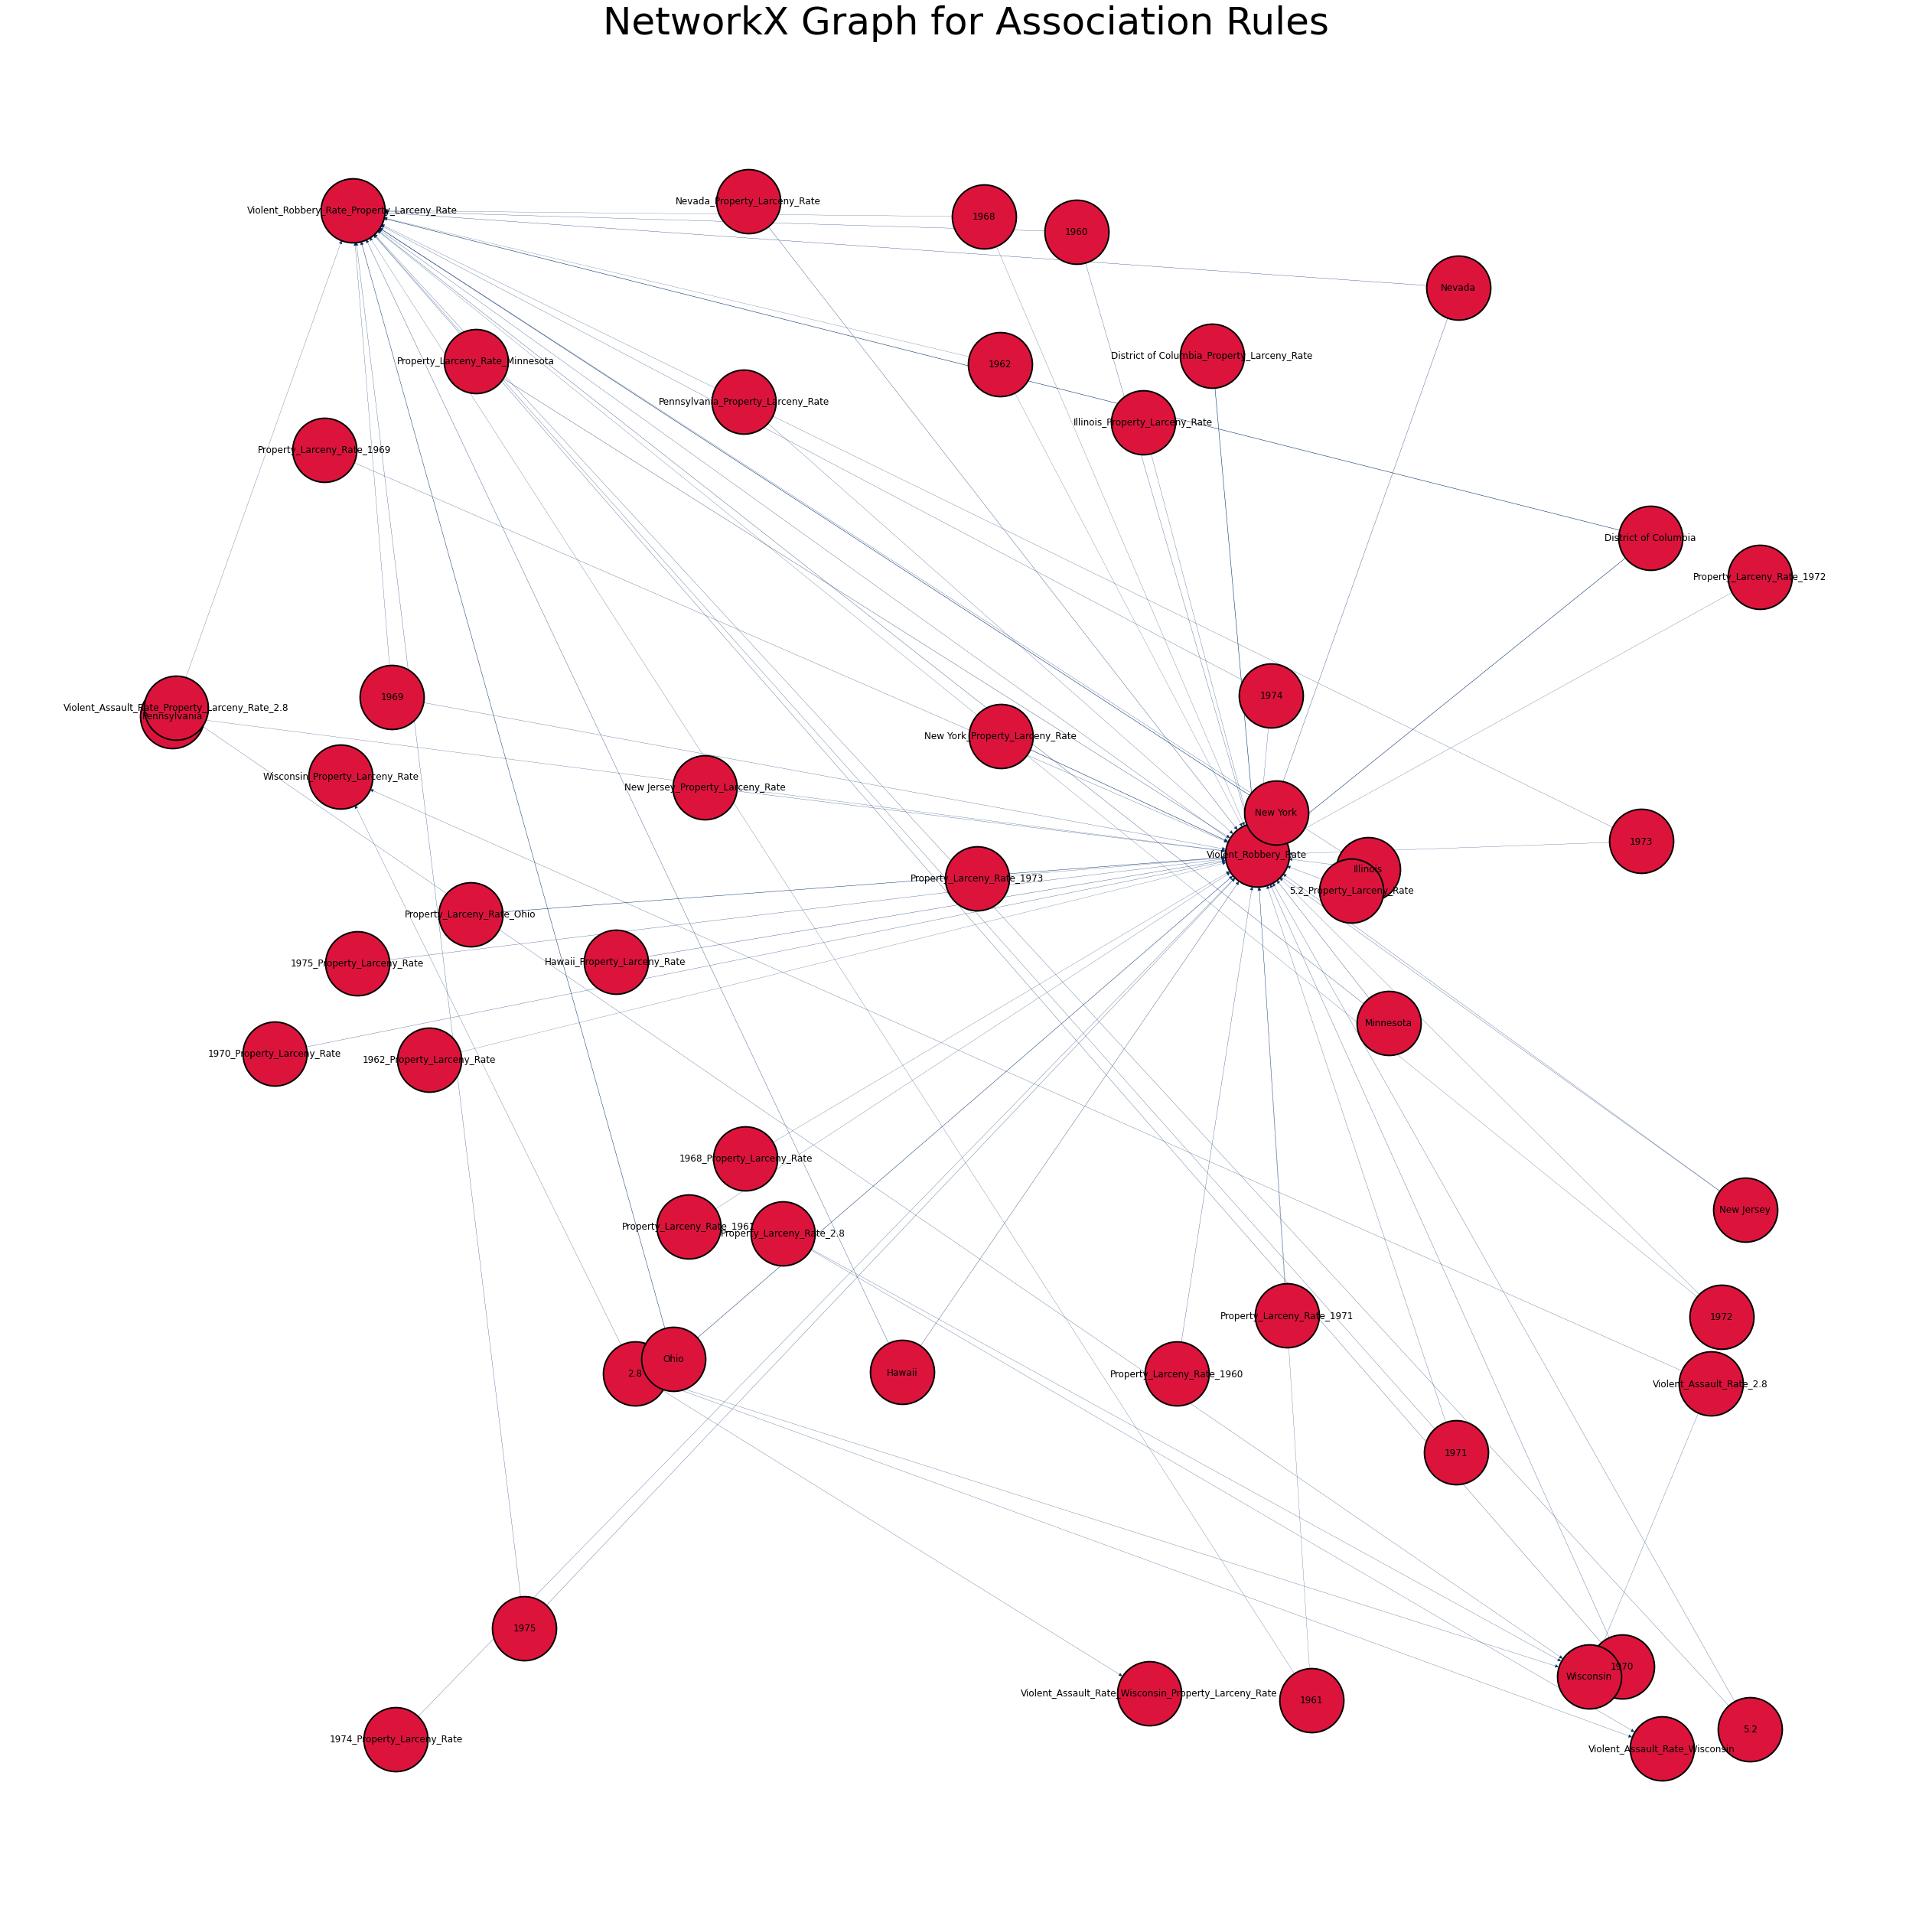

In [59]:
G = convert_to_network(result_df)
plot_network(G)

**CONCLUSION**

From the network graph, we can see how the locations are associated with different type of crimes for different year. When considering the two main crime category, the graphs shows us that there is association with two different crime types also, which also tells us that there is association between withon each category of crime.
